<a href="https://colab.research.google.com/github/rishav197/DL-assignments-IIITD/blob/main/A3/Q1/DL_A3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from keras.models import save_model, load_model

In [ ]:
import matplotlib.pyplot as plt
import random

In [ ]:
import json

In [ ]:
train_data1 = pd.read_pickle("/content/drive/MyDrive/DL Assignment 3 Dataset/sequentialMNIST.pickle")
# train_data1

In [ ]:
train_data2 = pd.read_pickle("/content/drive/MyDrive/DL Assignment 3 Dataset/permutedMNIST.pickle")
# train_data2

In [ ]:
# #test data for sequentialMNIST
# test_data1 = pd.read_pickle("PATH")
# # test_data1

In [ ]:
# #test data for permutedMNIST
# test_data2 = pd.read_pickle("PATH")
# # test_data2

In [ ]:
# For train data -> X, y
X_train_seq = train_data1['train']['images'].reshape(60000, 28, 28)
y_train_seq = train_data1['train']['labels']

X_train_per = train_data2['train']['images'].reshape(60000, 28, 28)
y_train_per = train_data2['train']['labels']

In [ ]:
# # For test data -> X, y
# X_test_seq = test_data1['train']['images'].reshape(10000, 28, 28)
# y_test_seq = test_data1['train']['labels']

# X_test_per = test_data2['train']['images'].reshape(10000, 28, 28)
# y_test_per = test_data2['train']['labels']

In [ ]:
X_train_seq.shape

In [ ]:
img_size = X_train_seq.shape[1]
print(img_size)

X_train_seq = np.reshape(X_train_seq, [-1, img_size, img_size])
X_train_per = np.reshape(X_train_per, [-1, img_size, img_size])

# Normalizing X_train for both datasets
X_train_seq = X_train_seq/255.0
X_train_per = X_train_per/255.0

In [ ]:
X_train_seq.shape

In [ ]:
X_train_per.shape

In [ ]:
y_train_seq

In [ ]:
y_train_seq.shape

In [ ]:
# Splitting training set into ratio of 85:15 train to validation set 
from sklearn.model_selection import train_test_split


X_train_seq, X_valid_seq, y_train_seq, y_valid_seq = train_test_split(X_train_seq, y_train_seq, train_size=0.80, shuffle=True)
X_train_per, X_valid_per, y_train_per, y_valid_per = train_test_split(X_train_per, y_train_per, train_size=0.80, shuffle=True)

In [ ]:
print("Sequential Data:")
print(X_train_seq.shape)
print(y_train_seq.shape)

print(X_valid_seq.shape)
print(y_valid_seq.shape)

print()
print("Permutated Data:")
print(X_train_per.shape)
print(y_train_per.shape)

print(X_valid_per.shape)
print(y_valid_per.shape)

#**Setup - 1**

## Part 1) Visualization of 3 random samples for Both SEQ and PERMUTATED Datasets

In [ ]:
# To hide unwanted warnings
import warnings
warnings.filterwarnings('ignore')

#function to show 5 ramdom images of 5 different digits
def showDigit(X, y, idx):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[idx], cmap=plt.get_cmap('gray'))
  plt.title(y[idx])
  plt.axis("off")
  

#Creating list of indices 0 to 59999
lst_idxs = []
for idx in range(len(X_train_per)):
  lst_idxs.append(idx)
# print(len(lst_idxs), lst_idxs[len(lst_idxs)-1])

#plotting images
for i in range(3):
  rand_idx = random.choice(lst_idxs)
  showDigit(X_train_seq, y_train_seq, rand_idx)

for i in range(3):
  rand_idx = random.choice(lst_idxs)
  # print(rand_idx)
  showDigit(X_train_per, y_train_per, rand_idx)

In [ ]:
print(X_train_seq[0].shape)
print(len(X_train_seq[0]))

print(X_train_seq.shape)

## Part 2) RNN-based architecture

In [ ]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
# Model parameters
input_shape = (28, 28)
batch_size = 128
units = 256

print(input_shape)

In [ ]:
model_seq = Sequential(name="RNN_plus_MLP")


model_seq.add(SimpleRNN(units=units, input_shape=input_shape))
model_seq.add(Dense(64, activation='relu'))
model_seq.add(Dense(32, activation='relu'))
model_seq.add(Dense(10, activation='softmax'))

model_seq.summary()

In [ ]:
model_seq.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
model_train_history_seq = model_seq.fit(X_train_seq, y_train_seq, epochs=20)

In [ ]:
model_valid_history_seq = model_seq.fit(X_valid_seq, y_valid_seq, epochs=20)

##Part 3) Plots

In [ ]:
train_loss = model_train_history_seq.history['loss']
valid_loss = model_valid_history_seq.history['loss']

print(train_loss)
print(valid_loss)

In [ ]:
epoch_arr = [num for num in range(1, len(train_loss)+1)]
epoch_arr

In [ ]:
# plot for training loss and validation loss
plt.plot(epoch_arr, train_loss)
plt.scatter(epoch_arr, train_loss)
plt.title("Plot: Train loss vs Epochs")
plt.ylabel("Train loss")   
plt.xlabel("Epochs")
plt.savefig("train_loss_epochs_seq.png", bbox_inches="tight", pad_inches=2, transparent=False)
plt.show()


plt.plot(epoch_arr, valid_loss)
plt.scatter(epoch_arr, valid_loss)
plt.title("Plot: Validation loss vs Epochs")
plt.ylabel("Validation loss")   
plt.xlabel("Epochs")
plt.savefig("valid_loss_epochs_seq.png", bbox_inches="tight", pad_inches=2, transparent=False)
plt.show()


##Part 4) Class-wise F1 Score

In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
model_seq.fit(X_train_seq, y_train_seq, epochs=20)

In [ ]:
plt.figure(figsize = (15, 2))
plt.imshow(X_valid_seq[5], cmap=plt.get_cmap('gray'))

In [ ]:
y_valid_pred = model_seq.predict(X_valid_seq)
y_valid_pred[5]

In [ ]:
np.argmax(y_valid_pred[5])

In [ ]:
y_valid_pred = [np.argmax(i) for i in y_valid_pred]


In [ ]:
y_valid_pred[:5]

In [ ]:
y_valid_seq[:5]

In [ ]:
print(metrics.classification_report(y_valid_seq, y_valid_pred, digits=2))

## Part 5) Model Pipeline

In [ ]:
# model1
model_seq1 = Sequential(name="RNN_plus_MLP")
model_seq1.add(SimpleRNN(units=units, input_shape=input_shape))
model_seq1.add(Dense(64, activation='relu'))
model_seq1.add(Dense(32, activation='relu'))
model_seq1.add(Dense(10, activation='softmax'))


model_seq1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# model2
model_seq2 = Sequential(name="RNN_plus_MLP")
model_seq2.add(SimpleRNN(units=units, input_shape=input_shape))
model_seq2.add(Dense(64, activation='relu'))
model_seq2.add(Dense(32, activation='relu'))
model_seq2.add(Dense(10, activation='softmax'))


model_seq2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

# model3
model_seq3 = Sequential(name="RNN_plus_MLP")
model_seq3.add(SimpleRNN(units=units, input_shape=input_shape))
model_seq3.add(Dense(64, activation='relu'))
model_seq3.add(Dense(32, activation='relu'))
model_seq3.add(Dense(10, activation='softmax'))


model_seq3.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


# model4
model_seq4 = Sequential(name="RNN_plus_MLP")
model_seq4.add(SimpleRNN(units=units, input_shape=input_shape))
model_seq4.add(Dense(64, activation='relu'))
model_seq4.add(Dense(32, activation='relu'))
model_seq4.add(Dense(10, activation='softmax'))


model_seq4.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
model_pipeline = []
model_lst = ["model_seq"+str(i) for i in range(1,5)]
print(model_lst)

model_pipeline.append(model_seq1)
model_pipeline.append(model_seq2)
model_pipeline.append(model_seq3)
model_pipeline.append(model_seq4)

# print(model_pipeline)

In [ ]:
f1_scores = []

for model in model_pipeline:
  # print(model)
  model.fit(X_train_seq, y_train_seq, epochs=20, verbose=0)
  y_pred = model.predict(X_valid_seq)
  y_pred = [np.argmax(i) for i in y_pred]
  # print(metrics.f1_score(y_valid_seq, y_pred, average="weighted"))
  f1_scores.append(metrics.f1_score(y_valid_seq, y_pred, average="weighted"))


pd.DataFrame({"Model":model_lst, "F1-Score":f1_scores})

375/375 [==============================] - 5s 13ms/step


,Model,F1-Score
0,model_seq1,0.893128
1,model_seq2,0.958146
2,model_seq3,0.923056
3,model_seq4,0.980646


Save Best Model

In [ ]:
save_model(model_seq4, 'model1.h5')

Load test file

In [ ]:
import pickle

In [ ]:
test_data = pd.read_pickle("/content/drive/MyDrive/sequentialTest.pickle")
# Extract the test features (X_test) and test labels (y_test)
X_test_seq = test_data['test']['images'].reshape(10000, 28, 28)

img_size = X_test_seq.shape[1]

X_train_seq = np.reshape(X_test_seq, [-1, img_size, img_size])
X_test_seq = X_test_seq/255.0

Load Model

In [ ]:
loaded_model = load_model('model1.h5')

Predict

In [ ]:
predictions = loaded_model.predict(X_test_seq)

313/313 [==============================] - 3s 9ms/step


In [ ]:
predictions = [np.argmax(i) for i in predictions]

In [ ]:
print(predictions)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Predicted Labels to Json

In [ ]:
predictions = [int(x) for x in predictions]

with open('G6_seq.json', 'w') as json_file:
  json.dump(predictions, json_file)

#**Setup - 2**

## Part 2) RNN-based architecture

In [ ]:
# Model parameters
input_shape = (28, 28)
batch_size = 128
units = 256

print(input_shape)

(28, 28)


In [ ]:
model_per = Sequential(name="RNN_plus_MLP")


model_per.add(SimpleRNN(units=units, input_shape=input_shape))
model_per.add(Dense(64, activation='relu'))
model_per.add(Dense(32, activation='relu'))
model_per.add(Dense(10, activation='softmax'))

model_per.summary()

Model: "RNN_plus_MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 256)               72960     
                                                                 
 dense_30 (Dense)            (None, 64)                16448     
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 10)                330       
                                                                 
Total params: 91,818
Trainable params: 91,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_per.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
model_train_history_per = model_per.fit(X_train_per, y_train_per, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.5300 - accuracy: 0.8498
Epoch 2/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.2134 - accuracy: 0.9361
Epoch 3/20
1500/1500 [==============================] - 44s 30ms/step - loss: 0.1644 - accuracy: 0.9502
Epoch 4/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1353 - accuracy: 0.9594
Epoch 5/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.1124 - accuracy: 0.9657
Epoch 6/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0999 - accuracy: 0.9689
Epoch 7/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0889 - accuracy: 0.9723
Epoch 8/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0752 - accuracy: 0.9769
Epoch 9/20
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0699 - accuracy: 0.9780
Epoch 10/20
1500/1500 [==============================] - 45s 30m

In [ ]:
model_valid_history_per = model_per.fit(X_valid_per, y_valid_per, epochs=20)

Epoch 1/20
375/375 [==============================] - 12s 31ms/step - loss: 0.2037 - accuracy: 0.9434
Epoch 2/20
375/375 [==============================] - 9s 25ms/step - loss: 0.1177 - accuracy: 0.9647
Epoch 3/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0752 - accuracy: 0.9762
Epoch 4/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0444 - accuracy: 0.9866
Epoch 5/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0216 - accuracy: 0.9954
Epoch 6/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0110 - accuracy: 0.9981
Epoch 7/20
375/375 [==============================] - 10s 27ms/step - loss: 0.0065 - accuracy: 0.9994
Epoch 8/20
375/375 [==============================] - 11s 29ms/step - loss: 0.0042 - accuracy: 0.9998
Epoch 9/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 10/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0024

##Part 3) Plots

In [ ]:
train_loss = model_train_history_per.history['loss']
valid_loss = model_valid_history_per.history['loss']

print(train_loss)
print(valid_loss)

[0.5300330519676208, 0.2133614867925644, 0.1644306182861328, 0.13534513115882874, 0.11240538209676743, 0.09987884759902954, 0.08887601643800735, 0.07519614696502686, 0.0698947161436081, 0.06118922308087349, 0.055099766701459885, 0.04767725616693497, 0.041120149195194244, 0.03855514153838158, 0.03478650748729706, 0.03671894967556, 0.02705872617661953, 0.025689374655485153, 0.025903776288032532, 0.027369745075702667]
[0.20366790890693665, 0.11773017048835754, 0.07523202151060104, 0.04438205063343048, 0.021638251841068268, 0.010956642217934132, 0.006526336073875427, 0.004168717190623283, 0.0031323737930506468, 0.0024021442513912916, 0.0020375894382596016, 0.0017938457895070314, 0.0015928583452478051, 0.0014387755654752254, 0.0013169912854209542, 0.0012116236612200737, 0.001125086098909378, 0.001042881514877081, 0.000980490236543119, 0.0009205606183968484]


In [ ]:
epoch_arr = [num for num in range(1, len(train_loss)+1)]
epoch_arr

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

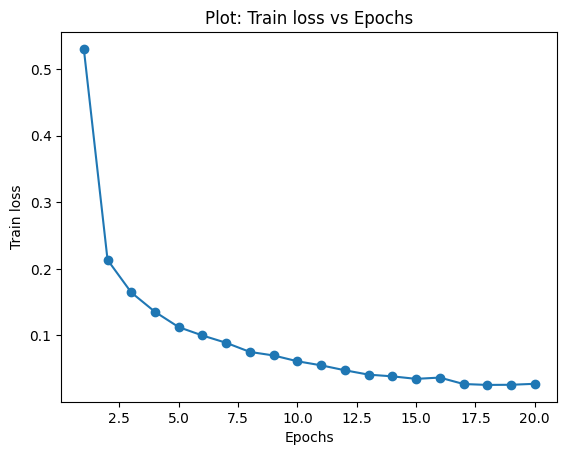

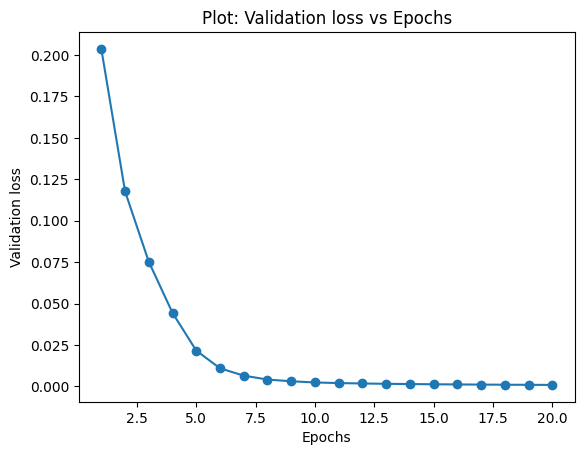

In [ ]:
# plot for training loss and validation loss
plt.plot(epoch_arr, train_loss)
plt.scatter(epoch_arr, train_loss)
plt.title("Plot: Train loss vs Epochs")
plt.ylabel("Train loss")   
plt.xlabel("Epochs")
plt.savefig("train_loss_epochs_per.png", bbox_inches="tight", pad_inches=2, transparent=False)
plt.show()


plt.plot(epoch_arr, valid_loss)
plt.scatter(epoch_arr, valid_loss)
plt.title("Plot: Validation loss vs Epochs")
plt.ylabel("Validation loss")   
plt.xlabel("Epochs")
plt.savefig("valid_loss_epochs_per.png", bbox_inches="tight", pad_inches=2, transparent=False)
plt.show()


##Part 4) Class-wise F1 Score

In [ ]:
model_per.fit(X_train_per, y_train_per, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0726 - accuracy: 0.9758
Epoch 2/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0331 - accuracy: 0.9889
Epoch 3/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0183 - accuracy: 0.9942
Epoch 4/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0120 - accuracy: 0.9966
Epoch 5/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 6/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0030 - accuracy: 0.9997
Epoch 7/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 8/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 9/20
1500/1500 [==============================] - 45s 30ms/step - loss: 6.8120e-04 - accuracy: 1.0000
Epoch 10/20
1500/1500 [==============================] - 45s

In [ ]:
y_valid_pred = model_per.predict(X_valid_per)

375/375 [==============================] - 4s 9ms/step


In [ ]:
y_valid_pred = [np.argmax(i) for i in y_valid_pred]

In [ ]:
print(metrics.classification_report(y_valid_per, y_valid_pred, digits=2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1116
           1       0.99      0.99      0.99      1384
           2       0.98      0.98      0.98      1214
           3       0.98      0.98      0.98      1266
           4       0.99      0.99      0.99      1188
           5       0.98      0.97      0.97      1076
           6       0.98      0.99      0.99      1192
           7       0.98      0.99      0.98      1198
           8       0.98      0.98      0.98      1185
           9       0.97      0.97      0.97      1181

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



## Part 5) Model Pipeline

In [ ]:
# model1
model_per1 = Sequential(name="RNN_plus_MLP")
model_per1.add(SimpleRNN(units=units, input_shape=input_shape))
model_per1.add(Dense(64, activation='relu'))
model_per1.add(Dense(32, activation='relu'))
model_per1.add(Dense(10, activation='softmax'))


model_per1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# model2
model_per2 = Sequential(name="RNN_plus_MLP")
model_per2.add(SimpleRNN(units=units, input_shape=input_shape))
model_per2.add(Dense(64, activation='relu'))
model_per2.add(Dense(32, activation='relu'))
model_per2.add(Dense(10, activation='softmax'))


model_per2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

# model3
model_per3 = Sequential(name="RNN_plus_MLP")
model_per3.add(SimpleRNN(units=units, input_shape=input_shape))
model_per3.add(Dense(64, activation='relu'))
model_per3.add(Dense(32, activation='relu'))
model_per3.add(Dense(10, activation='softmax'))


model_per3.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


# model4
model_per4 = Sequential(name="RNN_plus_MLP")
model_per4.add(SimpleRNN(units=units, input_shape=input_shape))
model_per4.add(Dense(64, activation='relu'))
model_per4.add(Dense(32, activation='relu'))
model_per4.add(Dense(10, activation='softmax'))


model_per4.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
model_pipeline = []
model_lst = ["model_per"+str(i) for i in range(1,5)]
print(model_lst)

model_pipeline.append(model_per1)
model_pipeline.append(model_per2)
model_pipeline.append(model_per3)
model_pipeline.append(model_per4)

# print(model_pipeline)

['model_per1', 'model_per2', 'model_per3', 'model_per4']


In [ ]:
f1_scores = []

for model in model_pipeline:
  # print(model)
  model.fit(X_train_per, y_train_per,epochs=20, verbose=0)
  y_pred = model.predict(X_valid_per)
  y_pred = [np.argmax(i) for i in y_pred]
  # print(metrics.f1_score(y_valid_seq, y_pred, average="weighted"))
  f1_scores.append(metrics.f1_score(y_valid_per, y_pred, average="weighted"))


pd.DataFrame({"Model":model_lst, "F1-Score":f1_scores})

Saved model

In [ ]:
save_model(model_per4, 'model2.h5')

load test file

In [ ]:
test_data = pd.read_pickle("/content/drive/MyDrive/permutedTest.pickle")

# Extract the test features (X_test) and test labels (y_test)
X_test_per = test_data['test']['images'].reshape(10000, 28, 28)

img_size = X_test_per.shape[1]

X_train_per = np.reshape(X_test_per, [-1, img_size, img_size])
X_test_per = X_test_per/255.0

load model

In [ ]:
loaded_model = load_model('model2.h5')

In [ ]:
predictions = loaded_model.predict(X_test_per)
predictions = [np.argmax(i) for i in predictions]
print(predictions)

Predicted Labels to Json

In [ ]:
predictions = [int(x) for x in predictions]

with open('G6_per.json', 'w') as json_file:
  json.dump(predictions, json_file)